# Coursera Dataset Exploration


## Introduction

### Business Question
What learning program onboarded would be most successful?

### Key Insights & Actionable Takeaways

- Professional Certificates attract the most students on average
- Professional Certificates are underrepresented—an opportunity niche
- Courses dominate in availability, especially for beginners and mixed levels

### Dataset
- Learning program dataset scrapped from Coursera Website
- Downloaded from [Kaggle](https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset)
- Contains 6 columns and 890 observations about Coursera leaning programs

## Cleaning


### Importing

Importing libraries and data

In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.style.use("dark_background")
pd.options.mode.chained_assignment = None

original_data = pd.read_csv('data/coursea_data.csv', index_col=0)
df = original_data.copy()

Having a look at data

In [279]:
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


As can be obsverved above, prefix 'course' is repeated befor every name - does not add value here. Changing column names

In [280]:
df = df.rename(
    columns={
        'course_title': 'Program',
        'course_organization': 'Organization',
        'course_Certificate_type': 'Type',
        'course_rating': 'Rating',
        'course_difficulty': 'Difficulty',
        'course_students_enrolled': 'Students'
    }
)

### Inspecting nulls

In [281]:
df.isnull().sum()

Program         0
Organization    0
Type            0
Rating          0
Difficulty      0
Students        0
dtype: int64

none found

### Checking data types 

In [282]:
df.dtypes

Program          object
Organization     object
Type             object
Rating          float64
Difficulty       object
Students         object
dtype: object

changing datatypes for better performance
* excluding 'Students' for now - will deal later

In [283]:
df = df.astype({
 	"Program": "string",
	"Organization": "string",
	"Type": "category",
	"Rating": "float32",
	"Difficulty": "category"
 })

'Students' column is an object with made of numbers and digits. let's have a deeper look: 

In [284]:
df['Students'].sort_values().unique()

array(['1.3m', '1.5k', '1.5m', '1.6k', '1.7k', '1.8k', '1.9k', '100k',
       '10k', '110k', '11k', '120k', '12k', '130k', '13k', '140k', '14k',
       '150k', '15k', '160k', '16k', '170k', '17k', '180k', '18k', '190k',
       '19k', '2.2k', '2.3k', '2.4k', '2.5m', '2.6k', '2.9k', '200k',
       '20k', '210k', '21k', '220k', '22k', '230k', '23k', '240k', '24k',
       '250k', '25k', '260k', '26k', '270k', '27k', '280k', '28k', '290k',
       '29k', '3.2k', '3.2m', '3.3k', '3.4k', '3.5k', '3.6k', '3.8k',
       '3.9k', '300k', '30k', '310k', '31k', '320k', '32k', '330k', '33k',
       '340k', '34k', '350k', '35k', '36k', '370k', '37k', '380k', '38k',
       '390k', '39k', '3k', '4.1k', '4.2k', '4.4k', '4.5k', '4.8k',
       '4.9k', '400k', '40k', '41k', '420k', '42k', '430k', '43k', '440k',
       '44k', '45k', '46k', '470k', '47k', '480k', '48k', '490k', '49k',
       '4k', '5.2k', '5.3k', '5.4k', '5.5k', '5.6k', '5.8k', '5.9k',
       '50k', '510k', '51k', '52k', '53k', '540k', '54k',

After sorting A-Z it can be seen they all start with digit. Let;s check the suffixes

In [285]:
df['Students'].str.strip().str[-1].unique()

array(['k', 'm'], dtype=object)

converting strings to integers

In [286]:
df["Students_old"] = df["Students"]
df["Students"] = (
    df["Students"]
    .str.lower()
    .str.replace("k", "*1_000", regex=False)
    .str.replace("m", "*1_000_000", regex=False)
    .map(pd.eval)
    .astype(int)
)

ensuring dtypes are ok

In [287]:
df.dtypes

Program         string[python]
Organization    string[python]
Type                  category
Rating                 float32
Difficulty            category
Students                 int64
Students_old            object
dtype: object

Ensuring convertion worked

In [288]:
df.head()

,Program,Organization,Type,Rating,Difficulty,Students,Students_old
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000,320k


Verifying dtypes

In [289]:
df.dtypes

Program         string[python]
Organization    string[python]
Type                  category
Rating                 float32
Difficulty            category
Students                 int64
Students_old            object
dtype: object

### Checking duplicates

In [290]:
# Count duplicates in course_title
program_duplicates = df.duplicated(subset=['Program']).sum()

# Check if the index itself has duplicates
index_duplicates = df.index.duplicated().sum()

print("Duplicate program:", program_duplicates)
print("Duplicate index:", index_duplicates)

# Duplicated course titles
df[df.duplicated(subset=['Program'], keep=False)]

Duplicate program: 3
Duplicate index: 0


,Program,Organization,Type,Rating,Difficulty,Students,Students_old
756,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41000,41k
205,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54000,54k
181,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290000,290k
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000,3.2m
241,Marketing Digital,Universidade de São Paulo,COURSE,4.8,Beginner,81000,81k
325,Marketing Digital,Universidad Austral,SPECIALIZATION,4.7,Beginner,39000,39k


Result: 3 duplicates found in course_title

Decision: Keeping duplicates

Reason: 
- 2 belong to different organizations;
- 1 hase same organization (Berklee College of Music). Tt turns out there is [specialization](https://www.coursera.org/specializations/musicianship-specialization?utm_medium=sem&utm_source=gg&utm_campaign=b2c_emea_x_coursera_ftcof_courseraplus_cx_dr_bau_gg_sem_bd-ex_s1_en_m_hyb_24-10_x&campaignid=21836581617&adgroupid=351685084750&device=c&keyword=coursera&matchtype=e&network=g&devicemodel=&creativeid=1449957450624&assetgroupid=&targetid=kwd-36262515261&extensionid=&placement=&gad_source=1&gad_campaignid=21836581617&gbraid=0AAAAADdKX6aAsQe4k8aaOvcvp_wGcvFD3&gclid=Cj0KCQjwo63HBhCKARIsAHOHV_X5t-EacPGmm0ut5gfHdxcCLfRdFrWhdYhTue_2dBssrYSByRQQQwcaArU5EALw_wcB#courses) with a course of a same name inside.

### Checking outliers:

In [291]:
numeric_cols = df.select_dtypes(include=['float32', 'int64']).columns

total_outlier_cells = 0
rows_with_outliers = pd.Series(False, index=df.index)
outlier_details = {}        
outlier_counts = {}        
outlier_percentages = {}   

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    

    is_outlier = (df[col] < lower_limit) | (df[col] > upper_limit)
    
    outlier_count = is_outlier.sum()
    if outlier_count > 0:
        outlier_details[col] = df.loc[is_outlier, col]
        outlier_counts[col] = outlier_count
        outlier_percentages[col] = outlier_count / len(df) * 100

    total_outlier_cells += outlier_count
    rows_with_outliers = rows_with_outliers | is_outlier

total_outlier_rows = rows_with_outliers.sum()
percentage_outlier_rows = total_outlier_rows / len(df) * 100

# Summary
print(f"Total outlier cells: {total_outlier_cells}")
print(f"Rows with at least 1 outlier: {total_outlier_rows} out of {len(df)} ({percentage_outlier_rows:.1f}%)")

# Per-column details
print("\nOutlier counts and percentages by column:")
for col in outlier_counts:
    print(f"{col}: {outlier_counts[col]} outliers ({outlier_percentages[col]:.1f}%)")

Total outlier cells: 95
Rows with at least 1 outlier: 94 out of 891 (10.5%)

Outlier counts and percentages by column:
Rating: 17 outliers (1.9%)
Students: 78 outliers (8.8%)


#### Rating
Only 7 outliers (1.9%) - unlkely to skew statistics.

Let us view the boxplot:

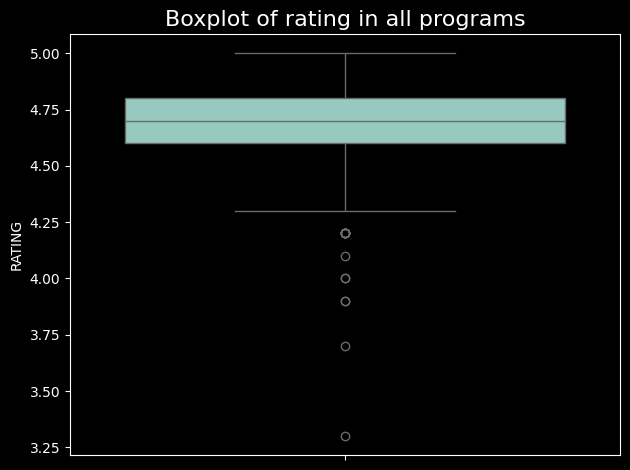

In [292]:
ax = sns.boxplot(y=df["Rating"])
plt.title("Boxplot of rating in all programs", fontsize=16)
plt.ylabel("RATING", fontsize=10)
plt.tight_layout()
plt.show()


As can be observed from boxplot it is pretty condensed.

#### Students enrolled
Let's have a look at boxplot:

<Figure size 640x480 with 0 Axes>

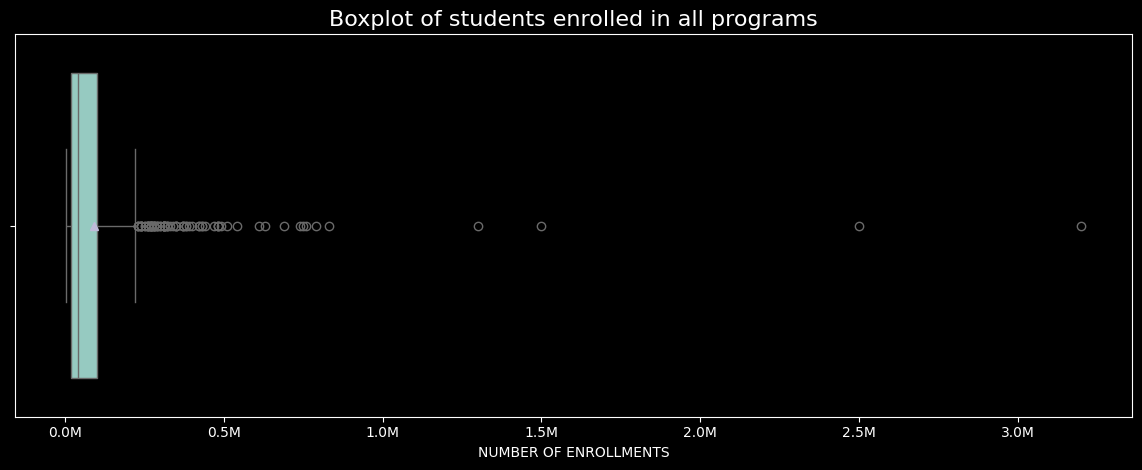

In [293]:
plt.figure(figsize=(plt.gcf().get_size_inches()[0]*1.8, plt.gcf().get_size_inches()[1]))
ax = sns.boxplot(x=df["Students"], showmeans=True)
plt.title("Boxplot of students enrolled in all programs", fontsize=16)
plt.xlabel("NUMBER OF ENROLLMENTS", fontsize=10)
plt.ylabel("")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.tight_layout()
plt.show()

it is visually obvious that this boxplot gives whole different

The amount of outliers in 'Students' - 78 outliers (8.8%) is not negligble
Outome: Median should be used instead of mean to avoid skewed result.


### Checking names
Checking for potential typos in certificate type and difficulty columns

In [294]:
cols_to_check = ['Type', 'Difficulty']
for col in cols_to_check:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print('-' * 40)

Unique values in 'Type':
['SPECIALIZATION', 'COURSE', 'PROFESSIONAL CERTIFICATE']
Categories (3, object): ['COURSE', 'PROFESSIONAL CERTIFICATE', 'SPECIALIZATION']
----------------------------------------
Unique values in 'Difficulty':
['Beginner', 'Intermediate', 'Mixed', 'Advanced']
Categories (4, object): ['Advanced', 'Beginner', 'Intermediate', 'Mixed']
----------------------------------------


- Difficulty looks good
- Certificate type needs casing fix

Applying casing fix for type


In [295]:
df['Type'] = df['Type'].str.capitalize()

Ensuring it worked

df.head()

In [296]:
df.head()

,Program,Organization,Type,Rating,Difficulty,Students,Students_old
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,Specialization,4.7,Beginner,5300,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,4.7,Intermediate,17000,17k
874,A Crash Course in Data Science,Johns Hopkins University,Course,4.5,Mixed,130000,130k
413,A Law Student's Toolkit,Yale University,Course,4.7,Mixed,91000,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,Course,4.8,Mixed,320000,320k


Exporting cleaced csv

In [304]:
df.to_csv('data/coursera_data_cleaned.csv', index=False)

## Exploration

### Rating:
Let's have a look at rating distribution between types nested by difficulty


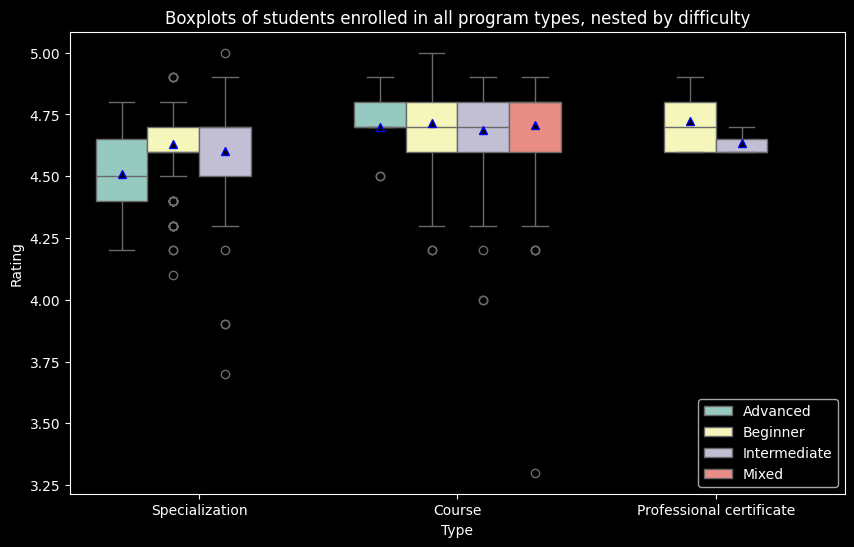

In [297]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Type", y="Rating", data=df, showmeans=True, log_scale=False,
                 meanprops={"markerfacecolor":"black", "markeredgecolor":"blue"}, hue="Difficulty")
ax.set_title("Boxplots of students enrolled in all program types, nested by difficulty")
plt.legend(loc='lower right')



- Specialization has slightly lower ratings, whereas courses and pro certs are simliar
- Pro certs don't show outliers, while other types show

### Students
Let's dig deeper into how on average students are distributed in tpes

Text(0.5, 1.0, 'Boxplots of students in enrolled in program types')

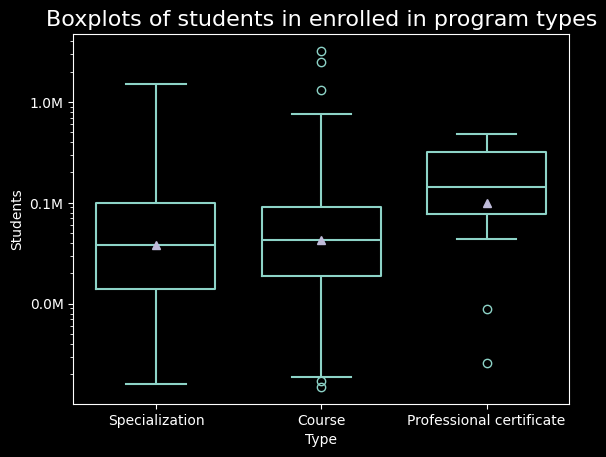

In [298]:
ax = sns.boxplot(
    x="Type", y="Students", data=df, showmeans=True, log_scale=True, fill=False, gap=.1)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.title("Boxplots of students in enrolled in program types", fontsize=16)


Profesional certficates appear to have a clearly higher average students amount

Let's nest them by difficuty

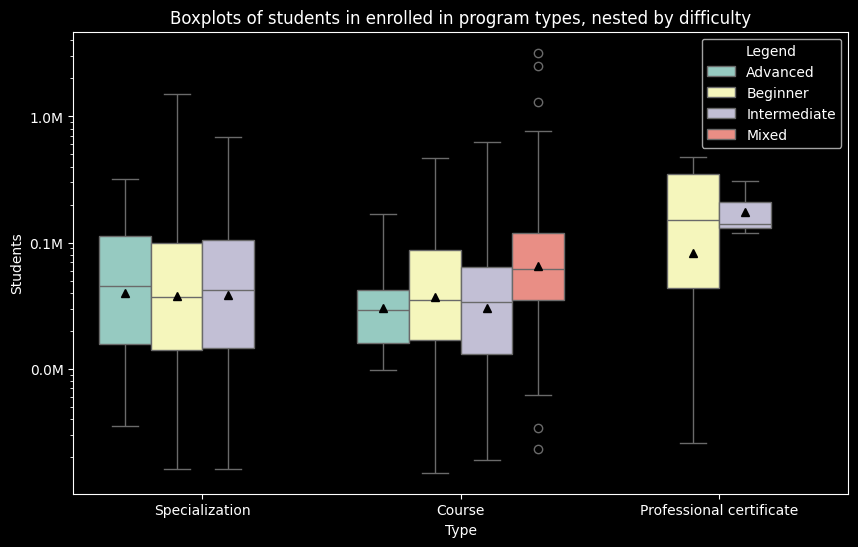

In [299]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Type", y="Students", data=df, showmeans=True, log_scale=True,
                 meanprops={"markerfacecolor":"black", "markeredgecolor":"black"}, hue="Difficulty")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
ax.set_title("Boxplots of students in enrolled in program types, nested by difficulty")
ax.legend(loc="upper right", title="Legend")

Nesting types by difficulty further confirms pro. certificites have highet average users throughout

### Correalation analysis

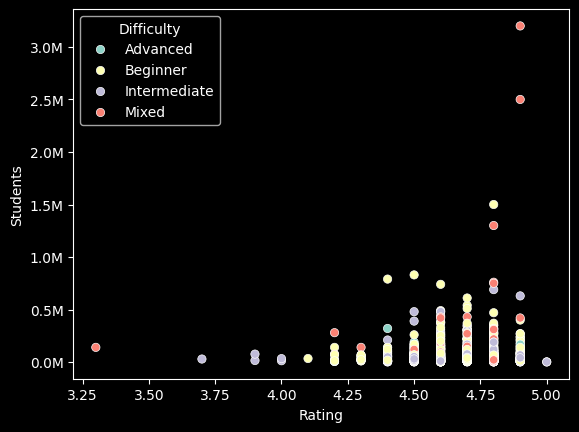

In [300]:
ax = sns.scatterplot(data=df, x="Rating", y="Students", hue="Difficulty")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))

No strong correlation can be observer between students enrolled count and rating

Let's see distribtion of number of courses per organization

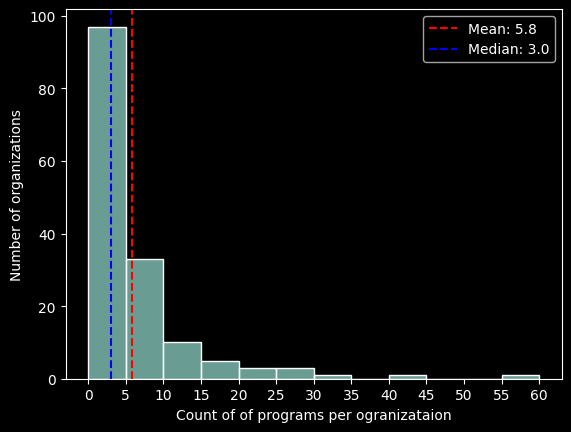

In [301]:
org_counts = df['Organization'].value_counts()

sns.histplot(org_counts, binwidth=5, stat='count', binrange=(0, 60))
plt.xticks(range(0, 61, 5))
plt.xlabel("Count of of programs per ogranizataion")
plt.ylabel("Number of organizations")

mean_val = org_counts.mean()
median_val = org_counts.median()

plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
plt.axvline(median_val, color='blue', linestyle='--', label=f'Median: {median_val:.1f}')

plt.legend()
plt.show()

Most of organizations have low amount of courses, averaging between 3.0 median and 5.8 mean.

### Checking total counts

/var/folders/7y/k9rdnbs53bqb645mkt13xl500000gn/T/ipykernel_1954/3672164996.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["Type", "Difficulty"])["Students"].sum().unstack(fill_value=0)[stack_order]


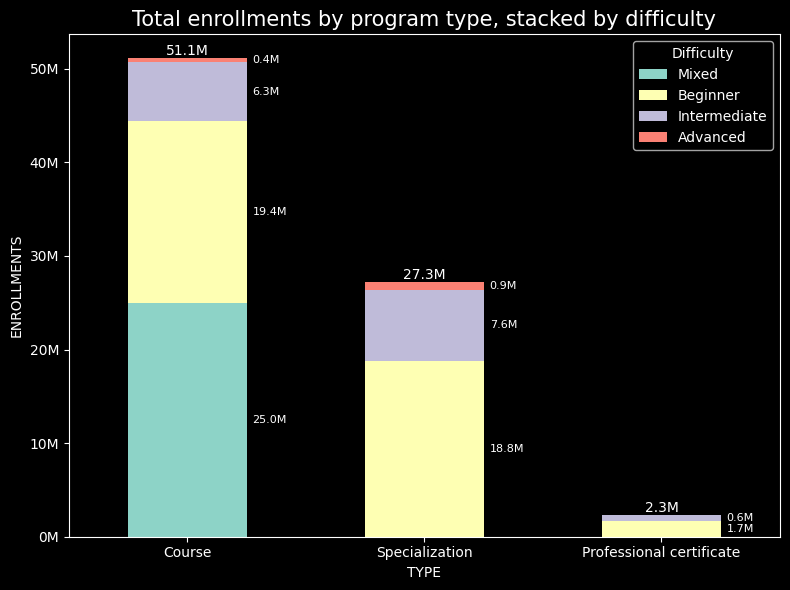

In [302]:
stack_order = [col for col in ["Mixed", "Beginner", "Intermediate", "Advanced"] if col in df["Difficulty"].unique()]
grouped = df.groupby(["Type", "Difficulty"])["Students"].sum().unstack(fill_value=0)[stack_order]
grouped = grouped.reindex(["Course", "Specialization", "Professional certificate"])

ax = grouped.plot(
    kind="bar",
    stacked=True,
    rot=0,
    figsize=(8,6)
)

plt.title("Total enrollments by program type, stacked by difficulty", fontsize=15)
plt.xlabel("TYPE")
plt.ylabel("ENROLLMENTS")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1_000_000)}M'))

totals = grouped.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(i, total, f'{total/1_000_000:.1f}M', ha='center', va='bottom', fontsize=10)

for container in ax.containers:
    for rect in container:
        if rect.get_height() > 0:
            x = rect.get_x() + rect.get_width()
            y = rect.get_y() + rect.get_height()/2
            ax.text(x + 0.01 * ax.get_xlim()[1], y, f'{rect.get_height()/1_000_000:.1f}M', va='center', ha='left', fontsize=8)

plt.legend(title="Difficulty")
plt.tight_layout()
plt.show()

- Course 
    - Most prevalent program type - courses (51.1M enrolled students)
    - Only type to contain Mixed dificulty programs
- Speciaization:
    - Comparable enrollemnts of beginner (19.4M ~ 18.8M) and intermeddiate programs (6.3M ~ 7.6M)
    - Advaned - 2x+ more than in courses (0.9M/0.4M ~ 2)
- Progessional certificate:
    - Least prelevant - 2.3M enrolled students

/var/folders/7y/k9rdnbs53bqb645mkt13xl500000gn/T/ipykernel_1954/146590275.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["Difficulty", "Type"])["Students"].sum().unstack(fill_value=0)


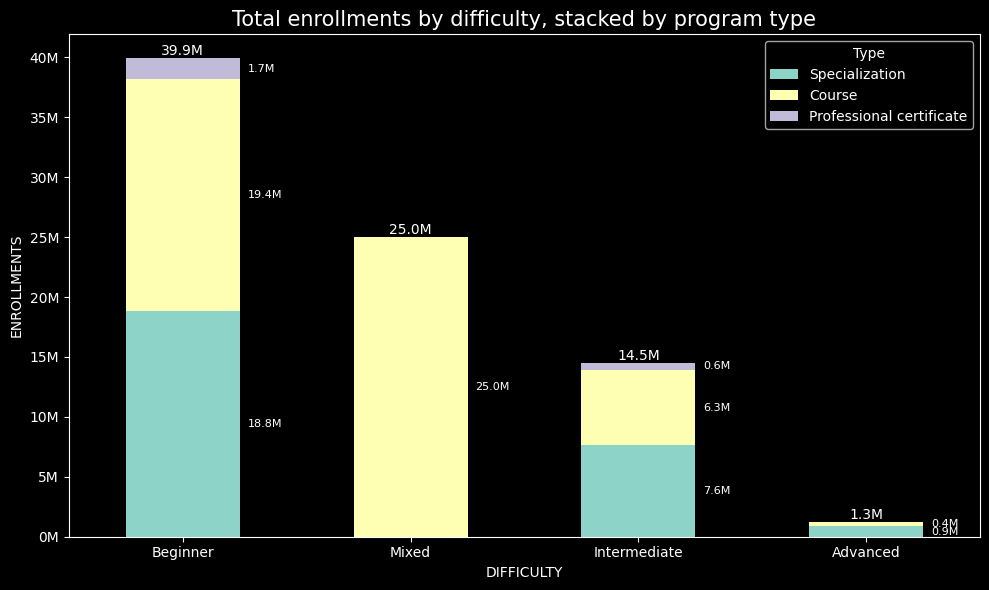

In [303]:
grouped = df.groupby(["Difficulty", "Type"])["Students"].sum().unstack(fill_value=0)
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]
order = ["Specialization", "Course", "Professional certificate"]
grouped = grouped[order]

ax = grouped.plot(
    kind="bar",
    stacked=True,
    rot=0,
    figsize=(10,6)
)

plt.title("Total enrollments by difficulty, stacked by program type", fontsize=15)
plt.xlabel("DIFFICULTY", fontsize=10)
plt.ylabel("ENROLLMENTS", fontsize=10)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1_000_000)}M'))

for i, total in enumerate(grouped.sum(axis=1)):
    ax.text(i, total, f'{total/1_000_000:.1f}M', ha='center', va='bottom', fontsize=10)

for container in ax.containers:
    for rect in container:
        if rect.get_height() > 0:
            ax.text(
                rect.get_x() + rect.get_width() + 0.01*ax.get_xlim()[1],
                rect.get_y() + rect.get_height()/2,
                f'{rect.get_height()/1_000_000:.1f}M',
                va='center', ha='left', fontsize=8
            )

plt.legend(title="Type")
plt.tight_layout()
plt.show()

* Beginner
     - most popular with 39.9M enrollements in total
* Mixed
    - 2nd most popular with 25M enrollemnts
     - are only comprised of courses
* Advanced
    - only 1.3M enrollments
    - specialization and courses only

## Conclusion



### Takeaways
1.	Professional Certificates attract the most students on average
    - Despite being less common, pro certs consistently show higher enrollments (150–190k on average) than courses or specializations.
2.	Professional Certificates are underrepresented—an opportunity niche
	-	They have the lowest prevalence among program types, suggesting high potential for growth if more offerings are developed.
3.	Courses dominate in availability, especially for beginners and mixed levels
	-	Courses account for the largest share of total enrollments and cater broadly to beginner learners, indicating that they remain important for onboarding large numbers of new learners.

### Limitations
- No timestamp data. Does not allow for a fair comparisson on program level. (Some programs may have been onboarded long time ago while others more recent)
- Unique student ID absence. It is not clear how any students have taken more than 1 program
- Competitor data missing
- Categorization by industry missing

### Next steps
- Evaluate after 6 months
- Scrape from competitors ()